In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\p1\AppData\Local\Temp\ipykernel_2568\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\p1\AppData\Local\Temp\ipykernel_2568\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5659 - accuracy: 0.7422 - val_loss: 0.5183 - val_accuracy: 0.7758
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4859 - accuracy: 0.7818 - val_loss: 0.4090 - val_accuracy: 0.8114
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8080 - val_loss: 0.3831 - val_accuracy: 0.8127
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3807 - accuracy: 0.8163 - val_loss: 0.3751 - val_accuracy: 0.8217
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8197 - val_loss: 0.3717 - val_accuracy: 0.8136
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3745 - accuracy: 0.8132 - val_loss: 0.3768 - val_accuracy: 0.8091
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3725 - accuracy: 0.8133 - val_loss: 0.3675 - val_accuracy: 0.8175

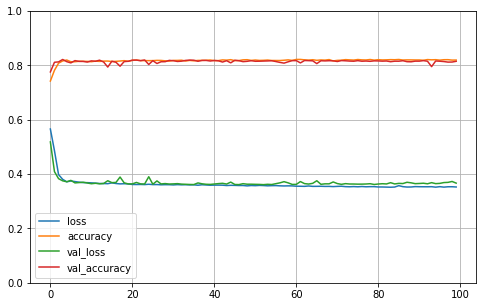

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 851us/step - loss: 0.3667 - accuracy: 0.8149


[0.36670148372650146, 0.8149402141571045]

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape


(30162, 41)


(15060, 41)

In [22]:
history2 = History()
model2 = Sequential()
model2.add(Dense(100,activation="tanh",input_shape=(X_train2.shape[1],)))
model2.add(Dense(50,activation="tanh"))
model2.add(Dense(10,activation="tanh"))
model2.add(Dense(1,activation="tanh"))
model2.summary()
model2.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history2 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3954 - accuracy: 0.8114 - val_loss: 0.3644 - val_accuracy: 0.8306
Epoch 2/100
943/943 [====================

In [24]:
history3 = History()
model3 = Sequential()
model3.add(Dense(100,activation="relu",input_shape=(X_train2.shape[1],)))
model3.add(Dense(50,activation="relu"))
model3.add(Dense(10,activation="relu"))
model3.add(Dense(1,activation="relu"))
model3.summary()
model3.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history3 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               4200      
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2306 - accuracy: 0.8892 - val_loss: 0.4292 - val_accuracy: 0.8349
Epoch 2/100
943/943 [====================

In [27]:
history4 = History()
model4 = Sequential()
model4.add(Dense(100,activation="elu",input_shape=(X_train2.shape[1],)))
model4.add(Dense(50,activation="elu"))
model4.add(Dense(10,activation="elu"))
model4.add(Dense(1,activation="elu"))
model4.summary()
model4.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history4 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               4200      
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 10)                510       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.1978 - accuracy: 0.9052 - val_loss: 0.5692 - val_accuracy: 0.8302
Epoch 2/100
943/943 [====================

In [28]:
history5 = History()
model5 = Sequential()
model5.add(Dense(100,activation="LeakyReLU",input_shape=(X_train2.shape[1],)))
model5.add(Dense(50,activation="LeakyReLU"))
model5.add(Dense(10,activation="LeakyReLU"))
model5.add(Dense(1,activation="LeakyReLU"))
model5.summary()
model5.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
history5 = model.fit(X_train2, y_train, validation_data= (X_test2, y_test), batch_size=32,epochs=100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               4200      
                                                                 
 dense_37 (Dense)            (None, 50)                5050      
                                                                 
 dense_38 (Dense)            (None, 10)                510       
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.1791 - accuracy: 0.9141 - val_loss: 0.6596 - val_accuracy: 0.8240
Epoch 2/100
943/943 [====================

# Zad. 
Stwórz wykres porównujący metody. 

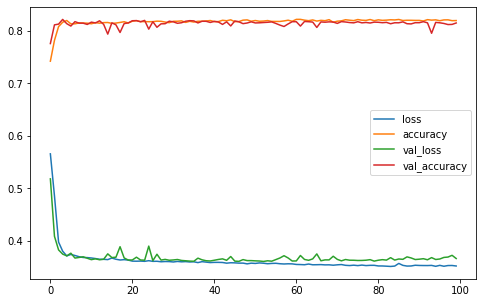

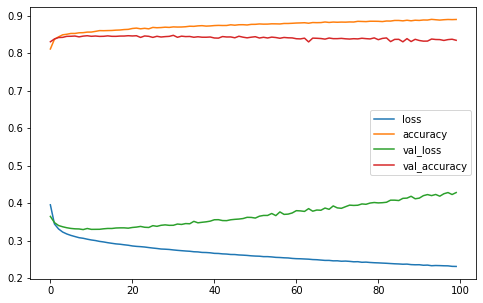

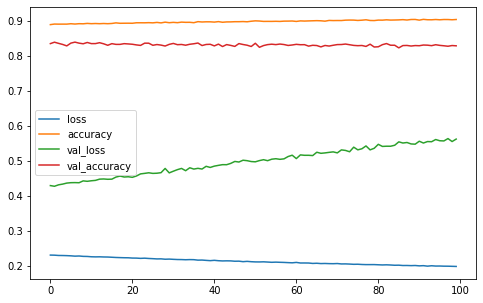

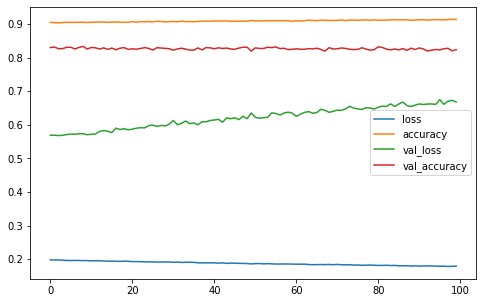

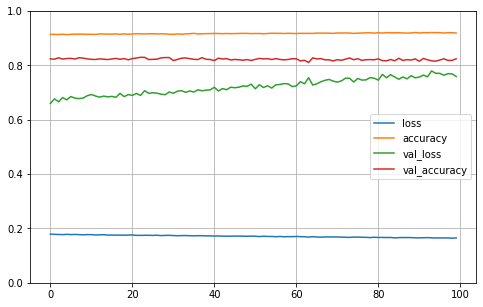

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()